In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


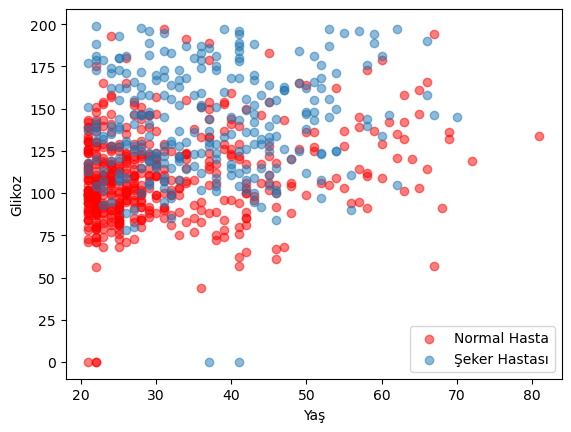

In [11]:
# Verileri daha iyi görmek için şeker hastaları ve şeker hastası olmayan hastaları ayırma

normalHasta = data[data.Outcome==0]
sekerHasta = data[data.Outcome==1]
plt.scatter(normalHasta.Age, normalHasta.Glucose, label="Normal Hasta", color = "red", alpha=0.5)
plt.scatter(sekerHasta.Age, sekerHasta.Glucose, label="Şeker Hastası", alpha=0.5)
plt.xlabel("Yaş")
plt.ylabel("Glikoz")
plt.legend()
plt.show()

In [16]:
# Eğitmek için veri seti ve etiket ayrılması gerekiyor

X = data.drop(["Outcome"], axis = 1)
y = data.Outcome.values

In [29]:
# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir

X = (X - X.min()) / (X.max() - X.min())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.3 ,random_state=1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

In [41]:
print("Score ", knn.score(x_test,y_test))

Score  1.0


In [42]:
# k değeri perfrmanslarını karşılaştırma 

for i in range(1,11):
    knnScore = KNeighborsClassifier(n_neighbors = i)
    knnScore.fit(x_train, y_train)
    print(i, knnScore.score(x_test, y_test)*100)

1 100.0
2 100.0
3 100.0
4 100.0
5 100.0
6 100.0
7 100.0
8 100.0
9 100.0
10 100.0
